First things first, let's import our dataset and check the type of variables.

In [53]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [54]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [56]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As we can see, we have 201 missing values, so we use MICE algorithm to impute NaN values.

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()

data.iloc[:, [2,8,9]] = mice_imputer.fit_transform(data.iloc[:, [2,8,9]])
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.598921,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,32.484819,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [58]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [59]:
data = data.drop(columns=['id'])

Let's check outliers in our dataset.

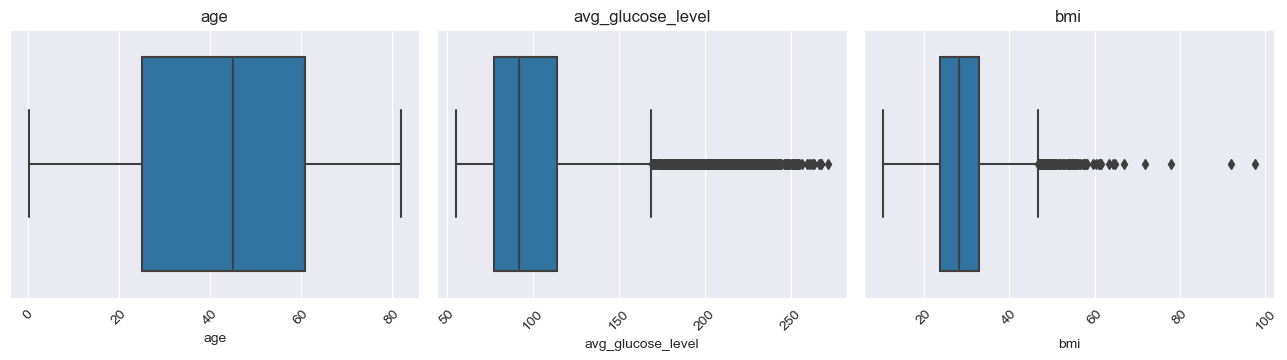

In [60]:
cols = tuple(data.columns)
cols_data=(cols[1], cols[7], cols[8])

labels= ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(13,30))
for i in range(len(cols_data)):
    plt.subplot(9,3,i+1)
    plt.title(labels[i])
    plt.xticks(rotation=45)
    sns.boxplot(data[cols_data[i]])

plt.tight_layout()

We can see outliers in our dataset, so we use the Local Outlier Factor to identify and remove outliers in our dataset.

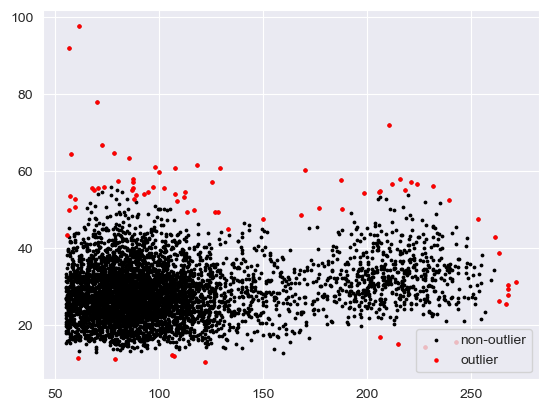

In [61]:
from sklearn.neighbors import LocalOutlierFactor

dc = data.loc[:, ['avg_glucose_level','bmi']]
clf = LocalOutlierFactor(n_neighbors=60)
y_pred = clf.fit_predict(data.loc[:, ['avg_glucose_level','bmi']])

plt.scatter(dc['avg_glucose_level'], dc['bmi'], color='k', s=3.0, label='non-outlier')
plt.scatter(dc[y_pred == -1]['avg_glucose_level'], dc[y_pred == -1]['bmi'], color='r', s=5.0, label='outlier')
plt.legend(loc='lower right')

plt.show()

data.loc[y_pred == 1, ['avg_glucose_level', 'bmi']] = dc[y_pred == 1]

Now we can perform EDA

In [62]:
data_copy = data.copy(deep = True)

data_copy["hypertension"] = np.where(data_copy["hypertension"] == 0, "No", "Yes")
data_copy["heart_disease"] = np.where(data_copy["heart_disease"] == 0, "No", "Yes")
data_copy["stroke"] = np.where(data_copy["stroke"] == 0, "No", "Yes")

data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,32.598921,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


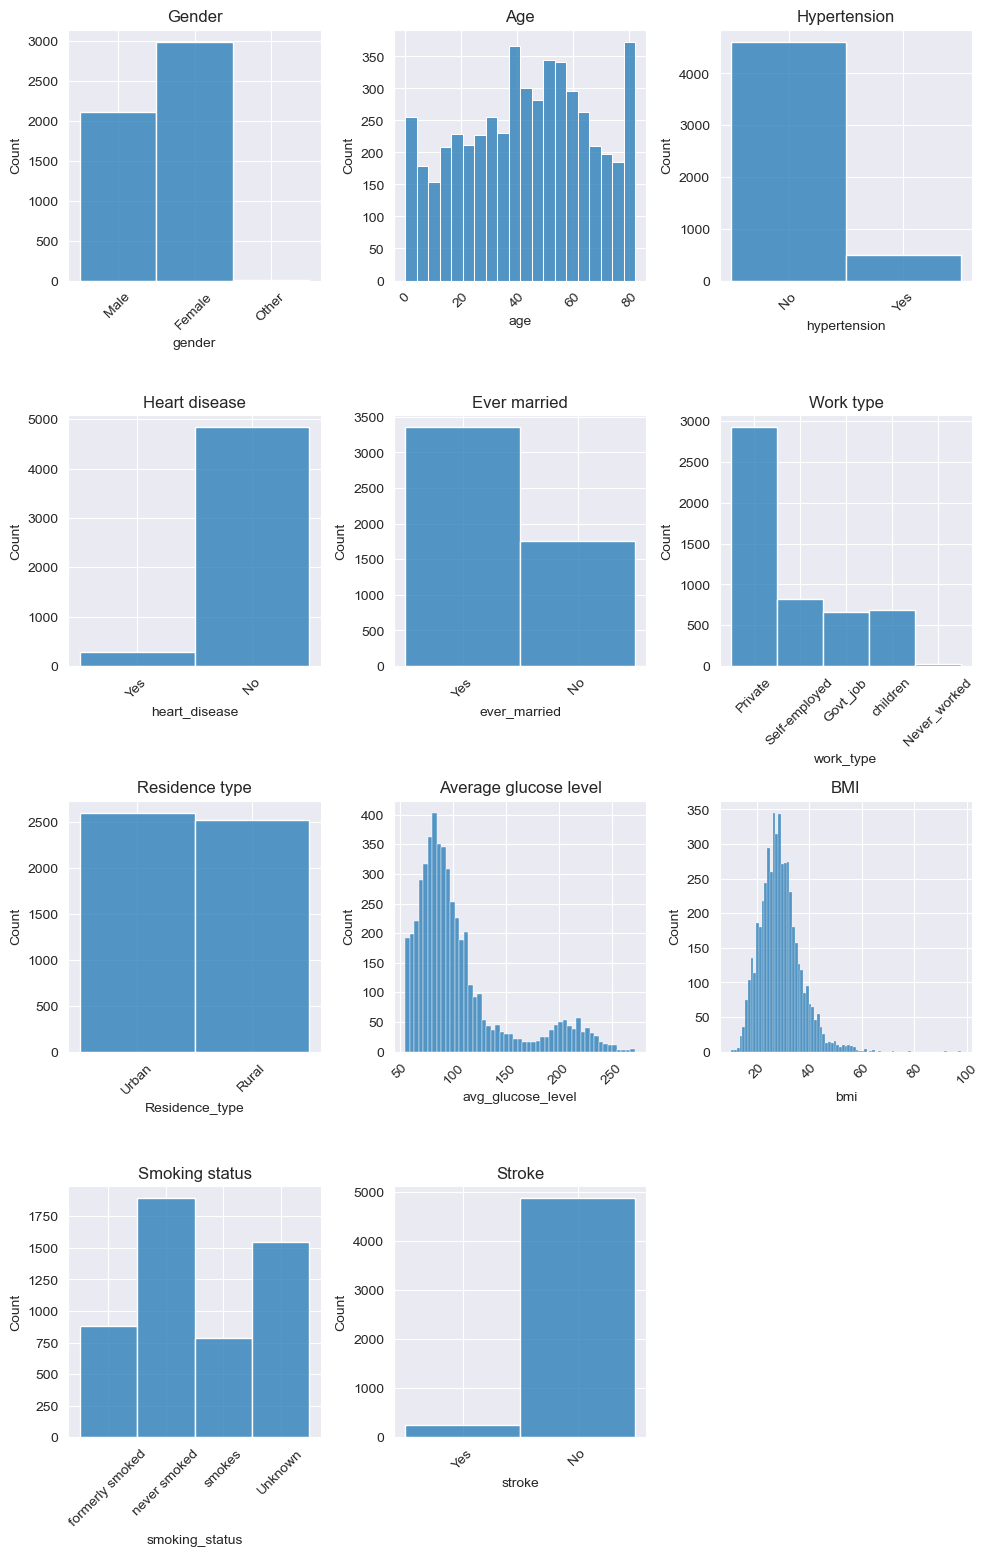

In [63]:
cols = list(data_copy.columns)
cols_data=cols[:]

labels= ['Gender', 'Age',
         'Hypertension',
         'Heart disease',
         'Ever married',
         'Work type',
         'Residence type',
         'Average glucose level',
         'BMI',
         'Smoking status',
         'Stroke']

plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(labels[i])
    plt.xticks(rotation=45)
    sns.histplot(data_copy[cols_data[i]])

plt.tight_layout()

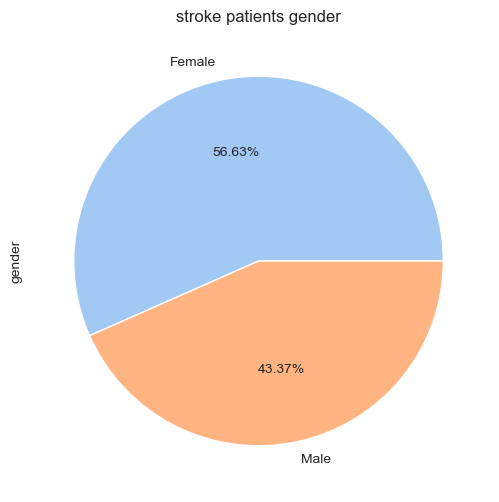

In [64]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['gender'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients gender')

plt.show()

We can see that the most of stroke patients are women, and there are 56.63 percent of all stroke cases

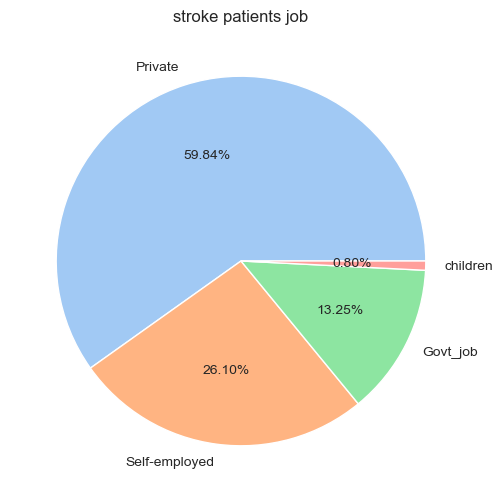

In [65]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['work_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients job')
plt.ylabel(None)

plt.show()

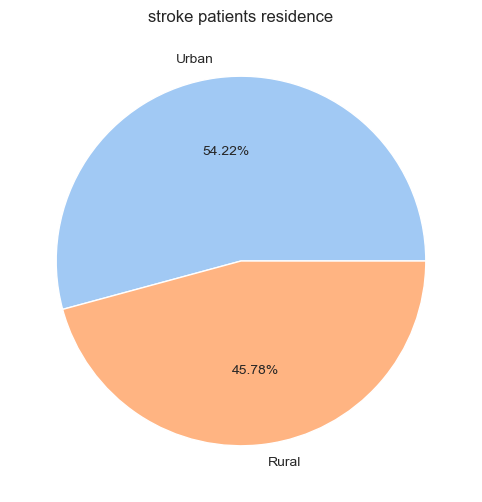

In [66]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['Residence_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients residence')
plt.ylabel(None)

plt.show()

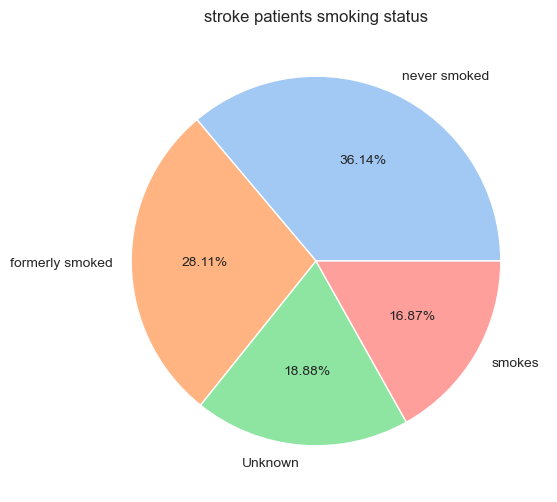

In [67]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['smoking_status'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients smoking status')
plt.ylabel(None)

plt.show()

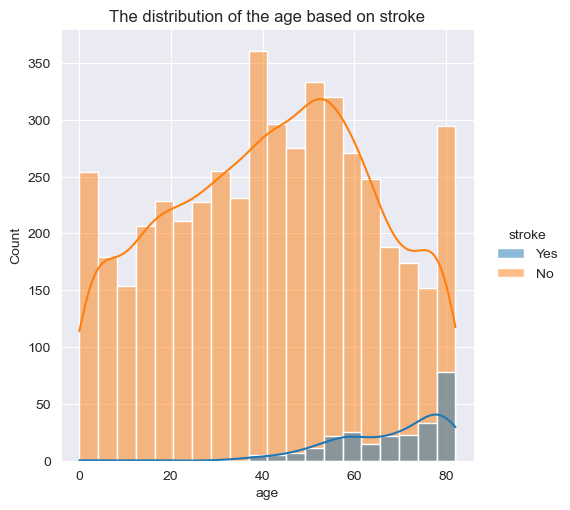

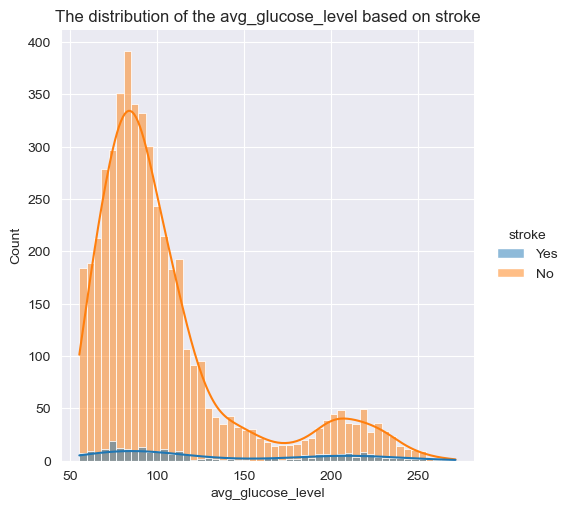

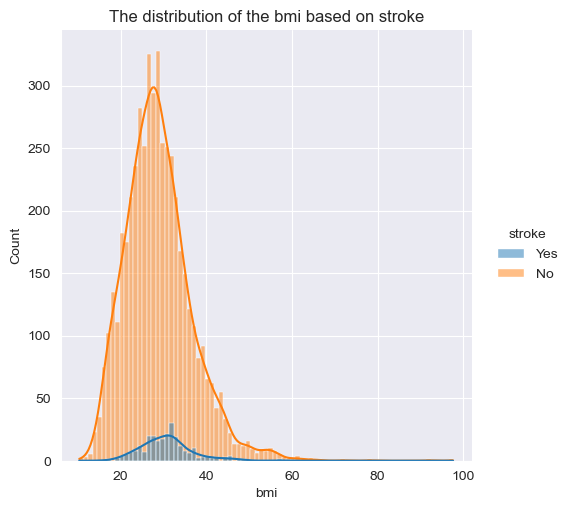

In [68]:
for i in data_copy.columns[:-1]:
    if data_copy[i].dtype == 'float64':
        sns.displot(data = data_copy, x = i, hue = 'stroke', kde = True)
        plt.title('The distribution of the {} based on stroke'.format(i))
        plt.show()

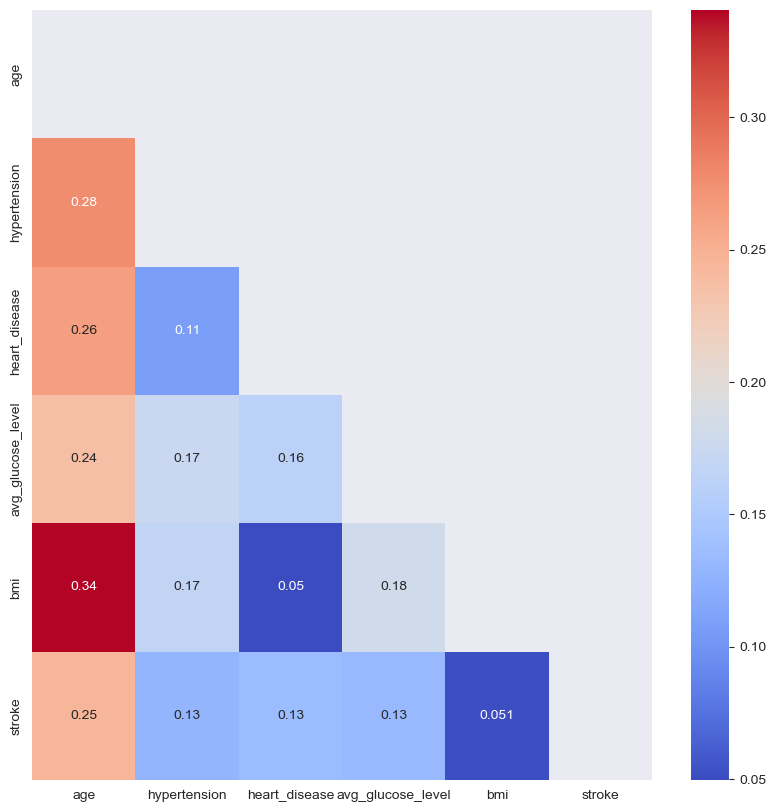

In [69]:
plt.figure(figsize=(10,10))
cor=data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot = True, cmap=plt.cm.coolwarm)
plt.show()

We can see that age is the most significant factor affecting the occurence of a stroke.

## Scikit-learn model

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold
from imblearn.over_sampling import  SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [71]:
X_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
X_num = data.drop(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)

X_cat = pd.get_dummies(X_cat)
X = pd.concat([X_num, X_cat], axis = 1)

y = data['stroke']

In [72]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

As we can see, we have imbalanced dataset so later we use SMOTETomek to solve this problem.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=444, stratify=y)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3832, 21)
Shape of X_test:  (1278, 21)
Shape of y_train:  (3832,)
Shape of y_test:  (1278,)


In [90]:
algorithms = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), AdaBoostClassifier(), DecisionTreeClassifier(), GaussianNB(), BernoulliNB(), SVC()]

results = pd.DataFrame(columns=['accuracy score', 'recall score', 'precision score', 'f-1 score', 'ROC AUC score'], index=[algorithm.__class__.__name__ for algorithm in algorithms])

for algorithm in algorithms:
    pipeline = make_pipeline(
        StandardScaler(),
        SMOTETomek(),
        algorithm)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    score_a = accuracy_score(y_test, y_pred)
    score_rec = recall_score(y_test, y_pred)
    score_p = precision_score(y_test, y_pred)
    score_f1 = f1_score(y_test, y_pred)
    score_roc = roc_auc_score(y_test, y_pred)

    results.loc[algorithm.__class__.__name__, 'accuracy score'] = score_a
    results.loc[algorithm.__class__.__name__, 'recall score'] = score_rec
    results.loc[algorithm.__class__.__name__, 'precision score'] = score_p
    results.loc[algorithm.__class__.__name__, 'f-1 score'] = score_f1
    results.loc[algorithm.__class__.__name__, 'ROC AUC score'] = score_roc

results.sort_values(by='accuracy score', ascending=False)

,accuracy score,recall score,precision score,f-1 score,ROC AUC score
RandomForestClassifier,0.917058,0.193548,0.176471,0.184615,0.573748
DecisionTreeClassifier,0.862285,0.290323,0.12,0.169811,0.590885
SVC,0.820814,0.483871,0.132159,0.207612,0.660932
KNeighborsClassifier,0.816119,0.322581,0.093897,0.145455,0.581932
AdaBoostClassifier,0.799687,0.596774,0.13806,0.224242,0.703404
LogisticRegression,0.751174,0.774194,0.136364,0.231884,0.762097
BernoulliNB,0.601721,0.758065,0.086876,0.155887,0.675907
GaussianNB,0.219092,1.0,0.058491,0.110517,0.589638


### RandomForest Classifier

As we can see, we should focus on RandomForestClassifier and perform hyperparameter tuning to achieve the best possible results.

In [91]:
pipeline = make_pipeline(
    PCA(n_components=0.99),
    StandardScaler(),
    SMOTETomek(),
    RandomForestClassifier(random_state=444))

rs = RandomizedSearchCV(
        estimator=pipeline,
    param_distributions={
        'randomforestclassifier__n_estimators': [5,20,50,100,200,500],
        'randomforestclassifier__max_depth': [int(x) for x in np.linspace(10, 150, num=15)],
        'randomforestclassifier__max_features': ['auto', 'sqrt'],
        'randomforestclassifier__min_samples_split': [2, 6, 10, 12],
        'randomforestclassifier__min_samples_leaf': [1, 3, 4, 6],
        'randomforestclassifier__bootstrap': [True, False]},
        n_iter=100,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=444),
        n_jobs=-1,
        verbose=2,
        scoring='f1')

rs.fit(X_train, y_train)

y_pred = rs.predict(X_test)

print(f'final model accuracy score: {round(accuracy_score(y_test, y_pred),3)}')
print(f'final model recall score: {round(recall_score(y_test, y_pred),3)}')
print(f'final model precision score: {round(precision_score(y_test, y_pred),3)}')
print(f'final model specificity score: {round(specificity_score(y_test, y_pred),3)}')
print(f'final model f-1 score: {round(f1_score(y_test, y_pred),3)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
final model accuracy score: 0.828
final model recall score: 0.581
final model precision score: 0.157
final model specificity score: 0.84
final model f-1 score: 0.247


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1216
           1       0.16      0.58      0.25        62

    accuracy                           0.83      1278
   macro avg       0.57      0.71      0.57      1278
weighted avg       0.94      0.83      0.87      1278



<AxesSubplot:>

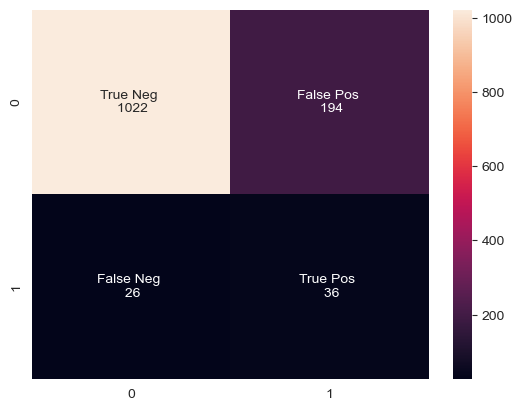

In [93]:
cm = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

labels = [f'{v1} \n {v2}' for v1, v2  in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

<Figure size 900x600 with 0 Axes>

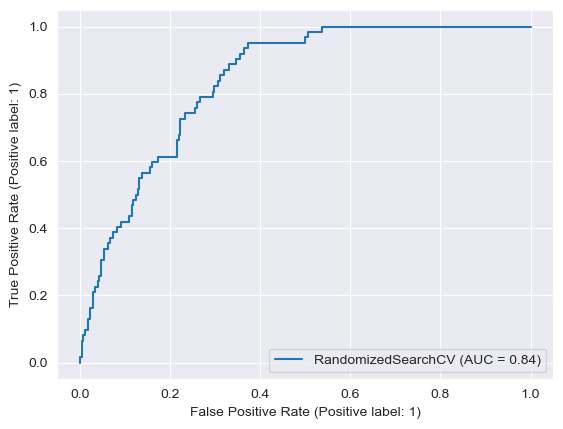

In [94]:
plt.figure(figsize = (9,6))
plot_roc_curve(rs, X_test, y_test)
plt.show()